In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


In [5]:
data = pd.read_csv('Downloads/sonar.all-data')

In [6]:
data.shape

(207, 61)

In [7]:
data.columns = [list(range(1,62))]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
(1,)     207 non-null float64
(2,)     207 non-null float64
(3,)     207 non-null float64
(4,)     207 non-null float64
(5,)     207 non-null float64
(6,)     207 non-null float64
(7,)     207 non-null float64
(8,)     207 non-null float64
(9,)     207 non-null float64
(10,)    207 non-null float64
(11,)    207 non-null float64
(12,)    207 non-null float64
(13,)    207 non-null float64
(14,)    207 non-null float64
(15,)    207 non-null float64
(16,)    207 non-null float64
(17,)    207 non-null float64
(18,)    207 non-null float64
(19,)    207 non-null float64
(20,)    207 non-null float64
(21,)    207 non-null float64
(22,)    207 non-null float64
(23,)    207 non-null float64
(24,)    207 non-null float64
(25,)    207 non-null float64
(26,)    207 non-null float64
(27,)    207 non-null float64
(28,)    207 non-null float64
(29,)    207 non-null float64
(30,)    207 non-null flo

In [9]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [10]:
data['Output'] = data[61]

In [11]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,Output
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R,R


In [12]:
data.drop(61, axis = 1, inplace = True)

In [13]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Output
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [14]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


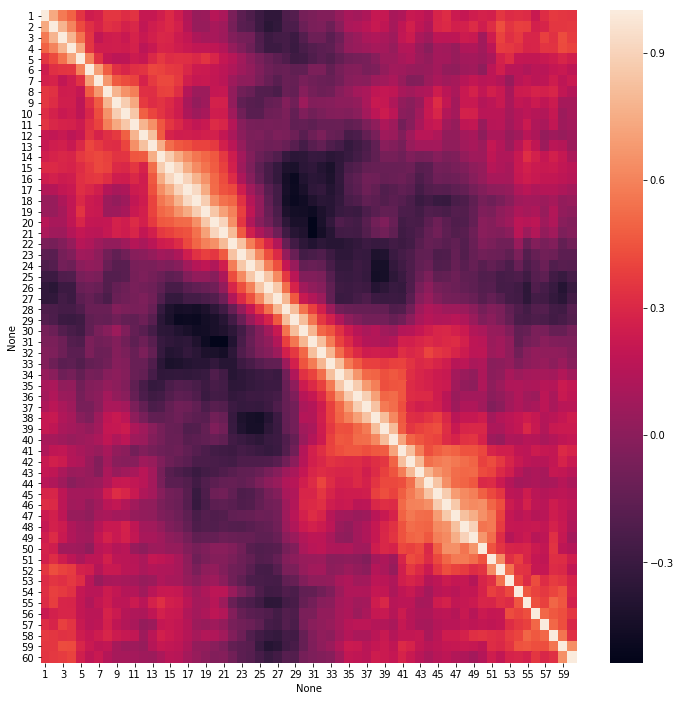

In [15]:
sonar_corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(sonar_corr,annot=False)

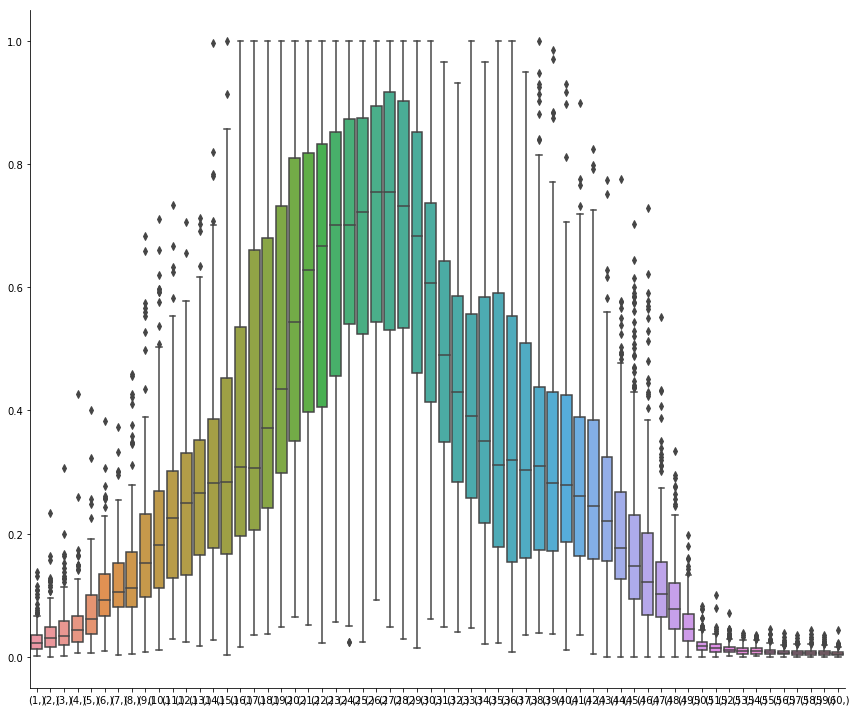

In [16]:
sns.catplot(data=data, kind="box",height=10,aspect=1.2);

In [17]:
le = LabelEncoder()

In [18]:
data['Output'] = le.fit_transform(data['Output'])

/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Output
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1


In [20]:
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [21]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,Output
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1


In [22]:
X = data.iloc[:,:-1]
X.shape

(207, 60)

In [23]:
y = data.iloc[:,-1]
y.shape

(207,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train.shape

(138, 60)

In [26]:
y_train.shape

(138,)

In [27]:
lr= LogisticRegression()

In [28]:
lr.fit(X_train,y_train)

/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
pred_1 = lr.predict(X_test)

In [30]:
print(accuracy_score(y_test,pred_1))
print(confusion_matrix(y_test,pred_1))
print(classification_report(y_test,pred_1))

0.782608695652174
[[27 12]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        39
           1       0.69      0.90      0.78        30

   micro avg       0.78      0.78      0.78        69
   macro avg       0.80      0.80      0.78        69
weighted avg       0.81      0.78      0.78        69



In [31]:
pca = PCA().fit(X_train)

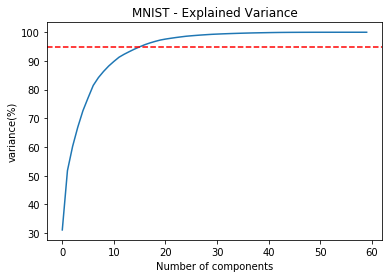

In [32]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('variance(%)')
plt.title('MNIST - Explained Variance')
plt.axhline(y=95,color = 'r', linestyle = '--')
plt.show()

In [33]:
pca  = PCA(15).fit(X_train)

In [34]:
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [35]:
X_train_transformed.shape

(138, 15)

In [37]:
X_test_transformed.shape

(69, 15)

In [38]:
lr.fit(X_train_transformed,y_train)

/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
pred = lr.predict(X_test_transformed)

In [40]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7971014492753623
[[28 11]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        39
           1       0.71      0.90      0.79        30

   micro avg       0.80      0.80      0.80        69
   macro avg       0.81      0.81      0.80        69
weighted avg       0.82      0.80      0.80        69



In [41]:
def models(modelName):
    m = modl[modelName]()
    m.fit(X_train_transformed, y_train)
    print("Model Name  :",modelName)
    print(accuracy_score(y_test,m.predict(X_test_transformed)))
    print(confusion_matrix(y_test,m.predict(X_test_transformed)))
    print(classification_report(y_test,m.predict(X_test_transformed)))
    print("_________________________________________________")

In [42]:
modl = {
    'GaussianNB':GaussianNB,
    'SVC':SVC,
    'DecisionTreeClassifier':DecisionTreeClassifier,
    'KNeighborsClassifier':KNeighborsClassifier
        }

In [43]:
for key in modl:
    models(key)

Model Name  : GaussianNB
0.782608695652174
[[30  9]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        39
           1       0.73      0.80      0.76        30

   micro avg       0.78      0.78      0.78        69
   macro avg       0.78      0.78      0.78        69
weighted avg       0.79      0.78      0.78        69

_________________________________________________
Model Name  : SVC
0.7391304347826086
[[31  8]
 [10 20]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        39
           1       0.71      0.67      0.69        30

   micro avg       0.74      0.74      0.74        69
   macro avg       0.74      0.73      0.73        69
weighted avg       0.74      0.74      0.74        69

_________________________________________________
Model Name  : DecisionTreeClassifier
0.6521739130434783
[[29 10]
 [14 16]]
              precision    recall  f1-score   support

/home/direwolf/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
for k in range(25):
    m = KNeighborsClassifier(n_neighbors=k+1)
    m.fit(X_train_transformed, y_train)
    print("Number  :",k+1)
    print(accuracy_score(y_test,m.predict(X_test_transformed)))
    print(confusion_matrix(y_test,m.predict(X_test_transformed)))
    print(classification_report(y_test,m.predict(X_test_transformed)))
    print("_________________________________________________")

Number  : 1
0.7971014492753623
[[33  6]
 [ 8 22]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        39
           1       0.79      0.73      0.76        30

   micro avg       0.80      0.80      0.80        69
   macro avg       0.80      0.79      0.79        69
weighted avg       0.80      0.80      0.80        69

_________________________________________________
Number  : 2
0.7536231884057971
[[34  5]
 [12 18]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        39
           1       0.78      0.60      0.68        30

   micro avg       0.75      0.75      0.75        69
   macro avg       0.76      0.74      0.74        69
weighted avg       0.76      0.75      0.75        69

_________________________________________________
Number  : 3
0.7971014492753623
[[33  6]
 [ 8 22]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.

[[28 11]
 [15 15]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        39
           1       0.58      0.50      0.54        30

   micro avg       0.62      0.62      0.62        69
   macro avg       0.61      0.61      0.61        69
weighted avg       0.62      0.62      0.62        69

_________________________________________________
Number  : 22
0.6376811594202898
[[29 10]
 [15 15]]
              precision    recall  f1-score   support

           0       0.66      0.74      0.70        39
           1       0.60      0.50      0.55        30

   micro avg       0.64      0.64      0.64        69
   macro avg       0.63      0.62      0.62        69
weighted avg       0.63      0.64      0.63        69

_________________________________________________
Number  : 23
0.6086956521739131
[[27 12]
 [15 15]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        39
           1    